In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [11]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 4) & (stat['21-mean'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
INVH,50,3.520686,1.900941,1.758657,3.809150
BXMT,50,2.305516,1.214537,1.752052,2.677343
SOHO,50,3.740036,2.184100,1.631085,3.034683
ARI,50,1.875937,2.115824,0.802691,3.719230
VNQ,50,1.369764,2.119358,0.562520,3.975014


In [9]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['INVH', 'BXMT'] -2.1746326782271286 -0.2855470628884096 1.6216231080536982 -3.5107087233924172


['INVH', 'BXMT']

In [12]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['BXMT', 'VNQ'], 0, 1)

['VNQ', 'INVH'] 1.051446677638752 1.4265818187938875 1.9460409665347917 -2.321176107689927
['VNQ', 'SOHO'] 0.8428854423832468 1.2840653403802023 1.7524241643579181 -2.1936040623548734
['BXMT', 'INVH'] -2.1746326782271286 -0.2855470628884096 1.6216231080536982 -3.5107087233924172


['BXMT', 'INVH']

In [5]:
quote.setup_mask(['BXMT', 'VNQ'])
quote.find_optimal_ratio(21, 2)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 BXMT    0.80911
 VNQ     0.19089
 dtype: float64, 2.1269, 1.1389)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
BXMT,50.0,2.305516,1.214537,-0.871525,1.828531,2.440569,3.279973,4.384921,1.752052,2.677343
Portfolio,50.0,2.124074,1.138607,-0.697041,1.583721,2.383564,2.848861,4.078925,1.709537,2.424969
VNQ,50.0,1.369764,2.119358,-2.311019,-0.126578,0.826831,3.075981,5.608280,0.562520,3.975014


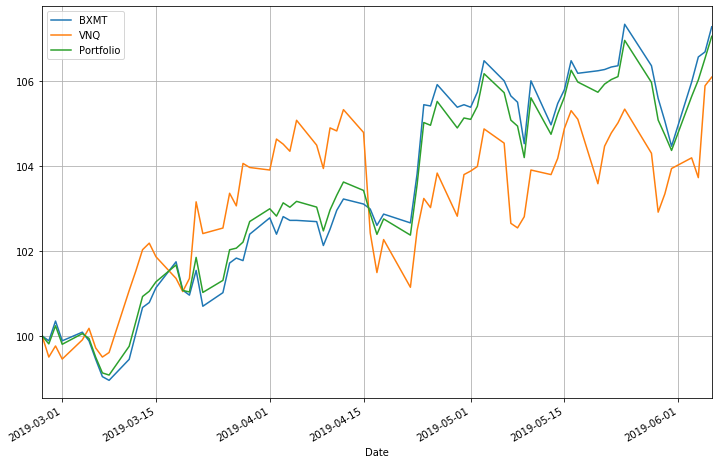

In [6]:
quote.graph(21, {'BXMT': .81, 'VNQ': .19})